# Pizza Huts Sales Forecasting Model

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
from sklearn.model_selection import train_test_split
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import json

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Plotting ahead multiple times        
def plot_forecasts(X, Y, yPred, index=0):
    store_index = 1
    plt.plot(X[index], marker=".")
    plt.plot(range(X.shape[1], X.shape[1]+y_test.shape[1]), Y[index], label='Actual', marker="o", c='b')
    plt.plot(range(X.shape[1], X.shape[1]+y_test.shape[1]), yPred[index], label='Forecast', marker="x", c='r')
    
    plt.axhline() 
    plt.grid(True)
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$', rotation=0)
    plt.legend()

# Plotting training & validation loss graph
def plot_loss_graph(loss_values):
    plt.plot(loss_values['loss'], marker='.', label='Testing Loss')
    plt.plot(loss_values['val_loss'], marker='.', label='Validation Loss')
    
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Call when after creating a graph but before using plt.show() with the fig_id being name of file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

This makes the code reproduce same results when using random determined code, alter the number to change the results. Also, check if a function has a random_state parameter, if it does add a number to make it reproduce the same results.
```py
np.random.seed(42)
tf.random.set_seed(42)
```

## Task 1

#### Load JSON File

In [4]:
DATAPATH = "data.json"

In [5]:
# Read the JSON file
with open(DATAPATH) as json_file:
    data = json.load(json_file)

### Forecast 1 month

#### First 50 months sales

In [6]:
X = np.array([list(store.values())[:50] for store in data.values()])
X = np.expand_dims(X, axis=-1)
X.shape

(15000, 50, 1)

#### $51^{st}$ months sales

In [7]:
Y = np.array([list(store.values())[50] for store in data.values()])
Y = np.expand_dims(Y, axis=-1)
Y.shape

(15000, 1)

## Task 2

#### Design model

In [8]:
def last_time_step_mse(Y_true, Y_pred): 
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [9]:
model = Sequential([
    Flatten(input_shape=[50, 1]),
    Dense(16),
    Dense(16),
    Dense(1)
])
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=[last_time_step_mse])

#### Split Dataset (70% for training, 20% for validation and 10% for testing)

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, train_size=7/10, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, train_size=2/3, random_state=42)

print("Train Set: ", X_train.shape[0])
print("Test Set: ", X_test.shape[0])
print("Valid Set: ", X_valid.shape[0])

Train Set:  10500
Test Set:  1500
Valid Set:  3000


#### Train Model

In [11]:
loss_values = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


329/329 [==============================] - 2s 2ms/step - loss: 0.0220 - last_time_step_mse: 0.0220 - val_loss: 0.0054 - val_last_time_step_mse: 0.0054
Epoch 2/20
329/329 [==============================] - 1s 2ms/step - loss: 0.0044 - last_time_step_mse: 0.0044 - val_loss: 0.0037 - val_last_time_step_mse: 0.0038
Epoch 3/20
329/329 [==============================] - 1s 2ms/step - loss: 0.0036 - last_time_step_mse: 0.0036 - val_loss: 0.0040 - val_last_time_step_mse: 0.0040
Epoch 4/20
329/329 [==============================] - 1s 2ms/step - loss: 0.0033 - last_time_step_mse: 0.0033 - val_loss: 0.0032 - val_last_time_step_mse: 0.0032
Epoch 5/20
329/329 [==============================] - 1s 2ms/step - loss: 0.0031 - last_time_step_mse: 0.0031 - val_loss: 0.0029 - val_last_time_step_mse: 0.0029
Epoch 6/20
329/329 [==============================] - 1s 2ms/step - loss: 0.0029 - last_time_step_mse: 0.0029 - val_loss: 0.0032 - val_last_time_step_mse: 0.0032
Epoch 7/20
329/329 [======

#### Evaluate the model

In [12]:
model.evaluate(X_valid, y_valid)

94/94 [==============================] - 0s 1ms/step - loss: 0.0025 - last_time_step_mse: 0.0025


[0.0025370283983647823, 0.0025382456369698048]

## Task 3

#### Plot the prediction and the actual sale

In [13]:
predictions = model.predict(X_test)

47/47 [==============================] - 0s 1ms/step


Saving figure forecasts_1m_0


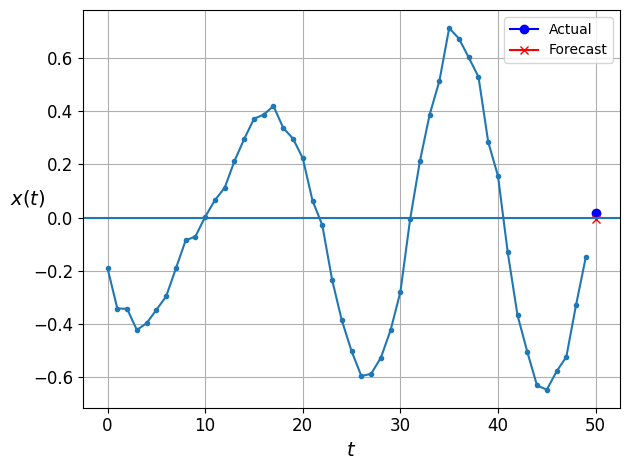

In [14]:
store_index = 0
plot_forecasts(X_test, y_test, predictions, store_index)
save_fig("forecasts_1m_" + str(store_index))

#### Plot training & validation loss values

Saving figure loss_graph_1m


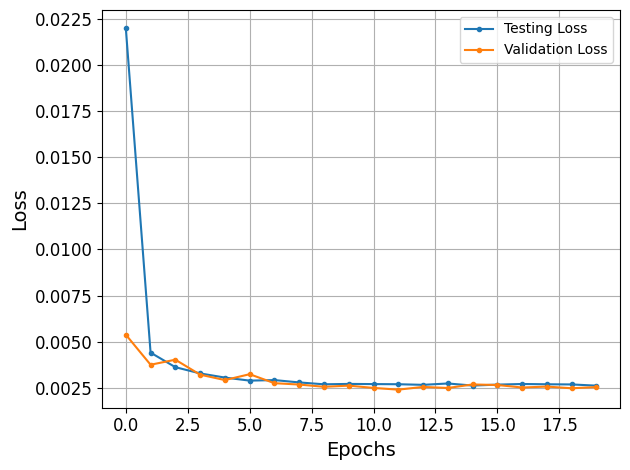

In [15]:
plot_loss_graph(loss_values.history)
save_fig("loss_graph_1m")

### Forecast 12 months

#### First 50 months sales

In [16]:
X = np.array([list(store.values())[:50] for store in data.values()])
X = np.expand_dims(X, axis=-1)
X.shape

(15000, 50, 1)

#### 12 following months sales

In [17]:
Y = np.array([list(store.values())[50:62] for store in data.values()])
Y = np.expand_dims(Y, axis=-1)
Y.shape

(15000, 12, 1)

#### Design model, Split Dataset and Train Model

In [18]:
# Design model
model = Sequential([
    Flatten(input_shape=[50, 1]),
    Dense(16),
    Dense(16),
    Dense(12)
])
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=[last_time_step_mse])

# Split Dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, train_size=7/10, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, train_size=2/3, random_state=42)

# Train Model
loss_values = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
329/329 [==============================] - 1s 2ms/step - loss: 0.0739 - last_time_step_mse: 0.0985 - val_loss: 0.0384 - val_last_time_step_mse: 0.0740
Epoch 2/20
329/329 [==============================] - 1s 2ms/step - loss: 0.0326 - last_time_step_mse: 0.0720 - val_loss: 0.0290 - val_last_time_step_mse: 0.0680
Epoch 3/20
329/329 [==============================] - 1s 2ms/step - loss: 0.0277 - last_time_step_mse: 0.0666 - val_loss: 0.0269 - val_last_time_step_mse: 0.0636
Epoch 4/20
329/329 [==============================] - 1s 2ms/step - loss: 0.0256 - last_time_step_mse: 0.0630 - val_loss: 0.0245 - val_last_time_step_mse: 0.0604
Epoch 5/20
329/329 [==============================] - 1s 2ms/step - loss: 0.0244 - last_time_step_mse: 0.0604 - val_loss: 0.0238 - val_last_time_step_mse: 0.0579
Epoch 6/20
329/329 [==============================] - 1s 2ms/step - loss: 0.0233 - last_time_step_mse: 0.0582 - val_loss: 0.0230 - val_last_time_step_mse: 0.0567
Epoch 7/20
329/329 [========

#### Evaluate and plot the model

In [19]:
model.evaluate(X_valid, y_valid)

94/94 [==============================] - 0s 1ms/step - loss: 0.0204 - last_time_step_mse: 0.0512


[0.020371295511722565, 0.051180996000766754]

In [20]:
predictions = np.expand_dims(model.predict(X_test), axis=-1)

47/47 [==============================] - 0s 977us/step


Saving figure forecasts_12m_0


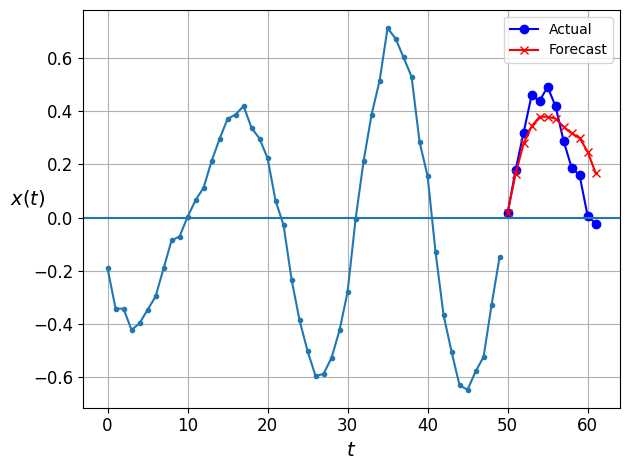

In [21]:
store_index = 0
plot_forecasts(X_test, y_test, predictions, store_index)
save_fig("forecasts_12m_" + str(store_index))

Saving figure loss_graph_12m


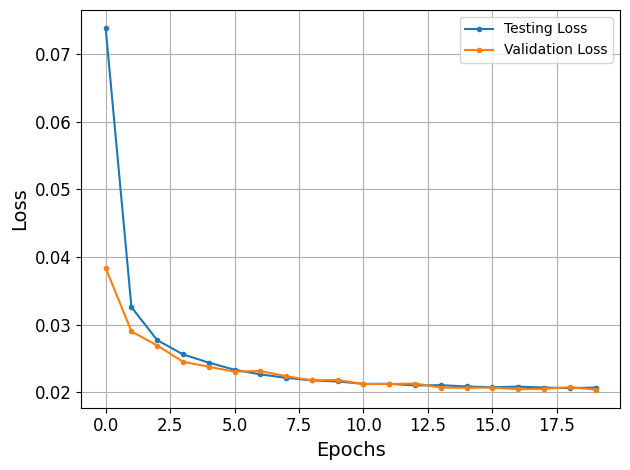

In [22]:
plot_loss_graph(loss_values.history)
save_fig("loss_graph_12m")